In [184]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as scsp
import scipy.integrate as scint
import sys
import scipy.stats
sys.path.insert(0, '/users/milan/nudetect')
import nudetect

In [2]:
CIT2037 = nudetect.Source("Eu155", 2037)

In [13]:
h119_Eu155 = nudetect.GammaFlood("floodEu155_5C_-500V_20190816_small_region.fits",
                                 detector="H119",
                                 source = CIT2037,
                                 voltage = 500,
                                 temp=5,
                                 data_dir='data',
                                 plot_dir='plots'
                                )

In [14]:
h119_Eu155.load_raw_data()

In [15]:
h119_Eu155.gen_count_map()

masked_array(
  data=[[--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        ...,
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=0,
  dtype=uint32)

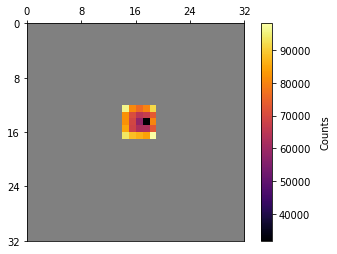

In [16]:
h119_Eu155.plot_pixel_map('Count')
#h119_Am241.plot_pixel_hist('Count')

In [20]:
other_data, _ = nudetect.fits_to_df("floodEu155_5C_-500V_20190816_small_region.fits",
                                   ["GRADE"],
                                   pos=0)
tp_mask = (h119_Eu155.raw_data_1d['STIM'] == 1)
grade_mask = (other_data['GRADE'] == 0)
bad_pix_mask = (h119_Eu155.raw_data_1d['RAWX'] == 17) & (h119_Eu155.raw_data_1d['RAWY'] == 14)

In [21]:
%%time
h119_Eu155.gen_quick_gain(plot_subdir='gamma_pix', misc_mask=~(tp_mask | bad_pix_mask) & grade_mask)

/users/milan/nudetect/nudetect.py:4009: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()
/users/milan/nudetect/nudetect.py:4009: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()
/users/milan/nudetect/nudetect.py:4009: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()
/users/milan/nudetect/nudetect.py:4009: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()
/users/milan/nudetect/nudetect.py:4009: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()
/users/milan/nudetect/nudetect.py:4

CPU times: user 24min 50s, sys: 1min 21s, total: 26min 11s
Wall time: 2min 14s


masked_array(
  data=[[--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        ...,
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=0.0)

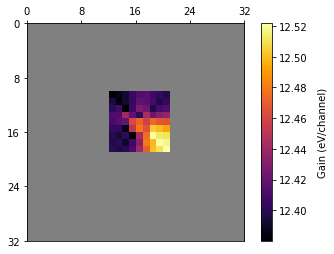

In [22]:
h119_Eu155.plot_pixel_map('Gain')

In [29]:
%%time
h119_Eu155.gen_spectrum(misc_mask=~(tp_mask | bad_pix_mask) & grade_mask)

CPU times: user 25min 34s, sys: 1min 22s, total: 26min 56s
Wall time: 3min


array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.59995000e-02, 2.79985000e-02, 3.99975000e-02, ...,
        1.19970002e+02, 1.19982001e+02, 1.19994000e+02]])

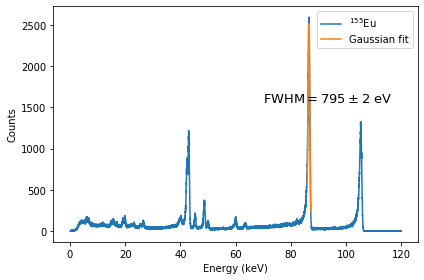

In [24]:
h119_Eu155.plot_spectrum(fit_below=50, fit_above=60)

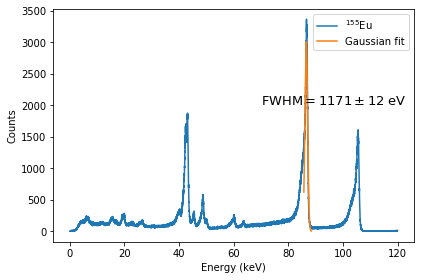

In [25]:
# no mask
h119_Eu155.gen_quick_gain(save_plot=False, save_data=False)
h119_Eu155.gen_spectrum(save_data=False)
h119_Eu155.plot_spectrum(save_plot=False)

In [26]:
from matplotlib.colors import LogNorm

In [30]:
clean_grade0_spectrum = h119_Eu155.spectrum

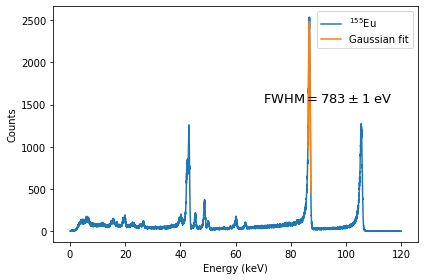

In [31]:
h119_Eu155.plot_spectrum(spectrum=clean_grade0_spectrum, fit_below=40, fit_above=50)

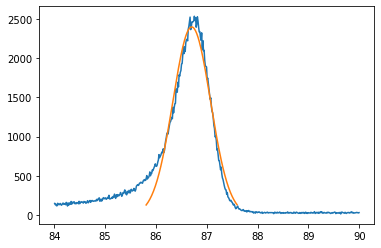

In [48]:
plt.plot(clean_grade0_spectrum[1][7000:7500], clean_grade0_spectrum[0][7000:7500])
plt.plot(clean_grade0_spectrum[1][7150:7300], line(clean_grade0_spectrum[1][7150:7300]))

In [33]:
clean_grade0_spectrum[0].argmax()

7229

In [34]:
from astropy.modeling import models, fitting

In [47]:
line_init = models.Gaussian1D(amplitude=2500, mean=87, stddev=0.8)
fit_line = fitting.LevMarLSQFitter()
line = fit_line(line_init, clean_grade0_spectrum[1][7150:7300], clean_grade0_spectrum[0][7150:7300])

In [51]:
from scipy.interpolate import UnivariateSpline

In [103]:
spline = UnivariateSpline(clean_grade0_spectrum[1][4930:5000],
                          clean_grade0_spectrum[0][4930:5000] - clean_grade0_spectrum[0][4930:5000].max()/2, s=0.001)
roots = spline.roots() # find the roots

In [104]:
roots[1] - roots[0]

0.6080545679462901

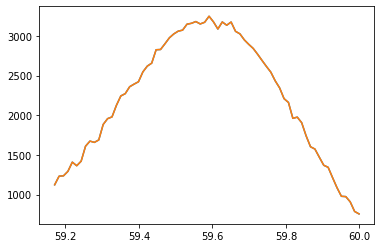

In [105]:
plt.plot(clean_grade0_spectrum[1][4930:5000], clean_grade0_spectrum[0][4930:5000])
plt.plot(clean_grade0_spectrum[1][4930:5000], spline(clean_grade0_spectrum[1][4930:5000]) + clean_grade0_spectrum[0].max()/2)

In [201]:
spline.roots()

array([59.25736209, 59.87291564, 59.99129095, 59.99687482])

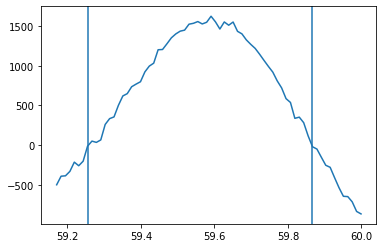

In [106]:
plt.plot(clean_grade0_spectrum[1][4930:5000], spline(clean_grade0_spectrum[1][4930:5000]))
for r in spline.roots():
    plt.axvline(r)

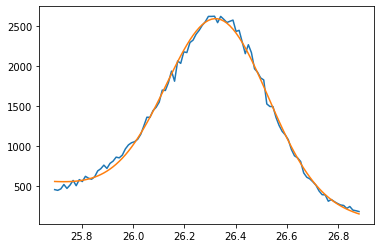

0.4677711677789126
2140


In [365]:
upper=2240
lower=2140

line_init = models.Gaussian1D(amplitude=3000, mean=26, stddev=0.8) + models.Linear1D(slope=-0.001, intercept=100)
fit_line = fitting.LevMarLSQFitter()
line = fit_line(line_init, clean_grade0_spectrum[1][lower:upper], clean_grade0_spectrum[0][lower:upper])
plt.plot(clean_grade0_spectrum[1][lower:upper], clean_grade0_spectrum[0][lower:upper])
plt.plot(clean_grade0_spectrum[1][lower:upper], line(clean_grade0_spectrum[1][lower:upper]))
plt.show()
print(line.stddev_0*2.355)

0.5157764570921799


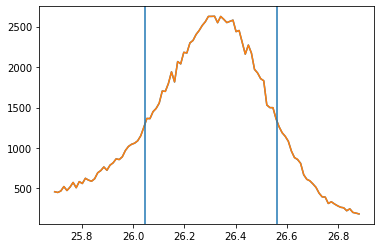

In [370]:
spline = UnivariateSpline(clean_grade0_spectrum[1][lower:upper],
                          clean_grade0_spectrum[0][lower:upper] - clean_grade0_spectrum[0][lower:upper].max()/2)
roots = spline.roots() # find the roots
print(roots[1] - roots[0])
plt.plot(clean_grade0_spectrum[1][lower:upper], clean_grade0_spectrum[0][lower:upper])
plt.plot(clean_grade0_spectrum[1][lower:upper], spline(clean_grade0_spectrum[1][lower:upper]) + clean_grade0_spectrum[0][lower:upper].max()/2)
plt.axvline(roots[0])
plt.axvline(roots[1])

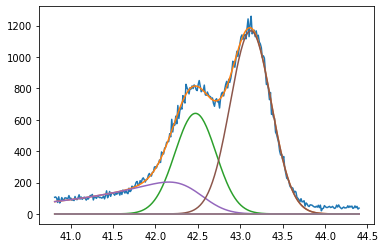

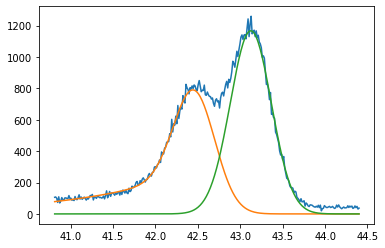

0.6421441841836284
0.5695445157707013


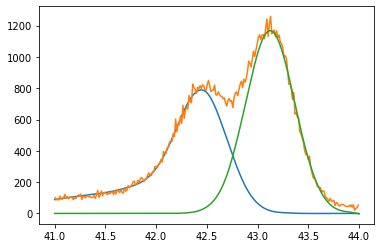

In [218]:
upper=3700
lower=3400

def tie_stddevs(model):
    return model.stddev_0

def tie_stddevs3(model):
    return model.stddev_3

def tie_means(model):
    return model.mean_0

def tie_means3(model):
    return model.mean_3

def exp_tail(x, norm=1, mean=0, stddev=1, slope=1):
    return norm*np.exp(slope*(x-mean))*(1-scipy.stats.norm.cdf(x, mean, stddev))

def exp_tail_deriv(x, norm=1, mean=0, stddev=1, slope=1):
    return [
        np.exp(slope*(x-mean))*(1-scipy.stats.norm.cdf(x, mean, stddev)),
        norm*np.exp(slope*(x-mean) - (x - mean)**2 / stddev**2 * 0.5)/(stddev*np.sqrt(2*np.pi)) -\
            norm*slope*np.exp(slope*(x-mean))*(1-scipy.stats.norm.cdf(x, mean, stddev)),
        norm*(x-mean)*np.exp(slope*(x-mean) - (x - mean)**2 / stddev**2 * 0.5)/(stddev*stddev*np.sqrt(2*np.pi)),
        norm*(x-mean)*np.exp(slope*(x-mean))*(1-scipy.stats.norm.cdf(x, mean, stddev))
    ]

ExpTail = models.custom_model(exp_tail, fit_deriv=exp_tail_deriv)

def const_shelf(x, norm=1, mean=0, stddev=1):
    return norm*(1-scipy.stats.norm.cdf(x, mean, stddev))

def const_shelf_deriv(x, norm=1, mean=0, stddev=1):
    return [
        (1-scipy.stats.norm.cdf(x, mean, stddev)),
        norm*np.exp(-0.5*(x-mean)**2 / stddev**2) / (np.sqrt(2*np.pi) * stddev),
        norm*(x-mean)*np.exp(-0.5*(x-mean)**2 / stddev**2) / (np.sqrt(2*np.pi) * stddev**2)
    ]

ConstShelf = models.custom_model(const_shelf, fit_deriv=const_shelf_deriv)

line_init = models.Gaussian1D(amplitude=1000, mean=42.4, stddev=0.4) + models.Linear1D(slope=-0.001, intercept=100) + \
    models.Gaussian1D(amplitude=1500, mean=43.2, stddev=0.4)

line_init = models.Gaussian1D(amplitude=1000, mean=42.4, stddev=0.4) + ConstShelf(norm=10, mean=42.4, stddev=0.4) + \
    ExpTail(norm=100, mean=42.4, stddev=0.4, slope=0.1) + models.Gaussian1D(amplitude=1500, mean=43.2, stddev=0.4) + \
    ConstShelf(norm=10, mean=43.2, stddev=0.4) + ExpTail(norm=100, mean=43.2, stddev=0.4, slope=0.1)

line_init.amplitude_0.min = 0
line_init.stddev_1.tied=tie_stddevs
line_init.mean_1.tied = tie_means
line_init.norm_1.min = 0
line_init.norm_1.max = None
line_init.stddev_2.tied=tie_stddevs
line_init.mean_2.tied = tie_means
line_init.norm_2.min = 0
line_init.norm_2.max = None

line_init.stddev_3.tied = tie_stddevs

line_init.stddev_4.tied=tie_stddevs3
line_init.mean_4.tied = tie_means3
line_init.norm_4.min = 0
line_init.norm_4.max = None
line_init.stddev_5.tied=tie_stddevs3
line_init.mean_5.tied = tie_means3
line_init.norm_5.min = 0
line_init.norm_5.max = None

fit_line = fitting.LevMarLSQFitter()
line = fit_line(line_init, clean_grade0_spectrum[1][lower:upper], clean_grade0_spectrum[0][lower:upper])
plt.plot(clean_grade0_spectrum[1][lower:upper], clean_grade0_spectrum[0][lower:upper])
plt.plot(clean_grade0_spectrum[1][lower:upper], line(clean_grade0_spectrum[1][lower:upper]))

plt.plot(clean_grade0_spectrum[1][lower:upper], line[0](clean_grade0_spectrum[1][lower:upper]))
plt.plot(clean_grade0_spectrum[1][lower:upper], line[1](clean_grade0_spectrum[1][lower:upper]))
plt.plot(clean_grade0_spectrum[1][lower:upper], line[2](clean_grade0_spectrum[1][lower:upper]))

plt.plot(clean_grade0_spectrum[1][lower:upper], line[3](clean_grade0_spectrum[1][lower:upper]))
plt.plot(clean_grade0_spectrum[1][lower:upper], line[4](clean_grade0_spectrum[1][lower:upper]))
plt.plot(clean_grade0_spectrum[1][lower:upper], line[5](clean_grade0_spectrum[1][lower:upper]))

plt.show()

plt.plot(clean_grade0_spectrum[1][lower:upper], clean_grade0_spectrum[0][lower:upper])
plt.plot(clean_grade0_spectrum[1][lower:upper], line[:3](clean_grade0_spectrum[1][lower:upper]))
plt.plot(clean_grade0_spectrum[1][lower:upper], line[3:](clean_grade0_spectrum[1][lower:upper]))
plt.show()

xs = np.linspace(41, 44, int(1e6))
spline = UnivariateSpline(xs,
                          line[:3](xs) - line[:3](xs).max()/2)
roots = spline.roots() # find the roots
plt.plot(xs, spline(xs)+line[:3](xs).max()/2)
plt.plot(clean_grade0_spectrum[1][np.abs(clean_grade0_spectrum[1] - 42.5) < 1.5],
         clean_grade0_spectrum[0][np.abs(clean_grade0_spectrum[1] - 42.5) < 1.5])
del xs, spline
print(roots[1] - roots[0])

xs = np.linspace(41, 44, int(1e6))
spline = UnivariateSpline(xs,
                          line[3:](xs) - line[3:](xs).max()/2)
roots = spline.roots() # find the roots
plt.plot(xs, spline(xs)+line[3:](xs).max()/2)
del xs, spline
print(roots[1] - roots[0])

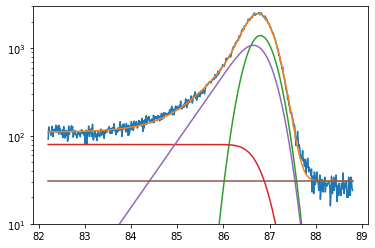

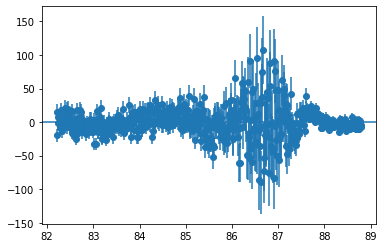

1.357284507047197
0.8049242221879922


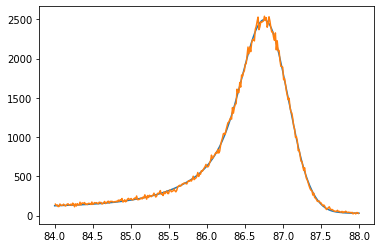

In [283]:
upper=7400
lower=6850

line_init = models.Gaussian1D(amplitude=1000, mean=86.8, stddev=0.4) + ConstShelf(norm=60, mean=86.8, stddev=0.4) + \
    ExpTail(norm=1600, mean=86.8, stddev=0.4, slope=1.5) + models.Const1D(amplitude=20)

line_init.amplitude_0.min = 0
line_init.stddev_1.tied=tie_stddevs
line_init.mean_1.tied = tie_means
line_init.norm_1.min = 0
line_init.norm_1.max = None
line_init.stddev_2.tied=tie_stddevs
line_init.mean_2.tied = tie_means
line_init.norm_2.min = 0
line_init.norm_2.max = None

fit_line = fitting.LevMarLSQFitter()
line = fit_line(line_init, clean_grade0_spectrum[1][lower:upper], clean_grade0_spectrum[0][lower:upper])
plt.plot(clean_grade0_spectrum[1][lower:upper], clean_grade0_spectrum[0][lower:upper])
plt.plot(clean_grade0_spectrum[1][lower:upper], line(clean_grade0_spectrum[1][lower:upper]))

plt.plot(clean_grade0_spectrum[1][lower:upper], line[0](clean_grade0_spectrum[1][lower:upper]))
plt.plot(clean_grade0_spectrum[1][lower:upper], line[1](clean_grade0_spectrum[1][lower:upper]))
plt.plot(clean_grade0_spectrum[1][lower:upper], line[2](clean_grade0_spectrum[1][lower:upper]))
plt.plot(clean_grade0_spectrum[1][lower:upper], line[3](clean_grade0_spectrum[1][lower:upper]))
plt.semilogy()
plt.ylim(10,3000)
plt.show()

plt.errorbar(clean_grade0_spectrum[1][lower:upper],
             clean_grade0_spectrum[0][lower:upper] - line(clean_grade0_spectrum[1][lower:upper]),
             yerr=np.sqrt(clean_grade0_spectrum[0][lower:upper]),
             fmt='o'
            )
plt.axhline(0)
plt.show()
chisq_red = np.sum(((clean_grade0_spectrum[0][lower:upper] - line(clean_grade0_spectrum[1][lower:upper])) ** 2)/\
                   clean_grade0_spectrum[0][lower:upper])/len(clean_grade0_spectrum[0][lower:upper] - 7)
print(chisq_red)

xs = np.linspace(84, 88, int(1e6))
spline = UnivariateSpline(xs,
                          line(xs) - line(xs).max()/2)
roots = spline.roots() # find the roots
plt.plot(xs, spline(xs)+line(xs).max()/2)
plt.plot(clean_grade0_spectrum[1][np.abs(clean_grade0_spectrum[1] - 86) < 2],
         clean_grade0_spectrum[0][np.abs(clean_grade0_spectrum[1] - 86) < 2])
del xs, spline
print(roots[1] - roots[0])


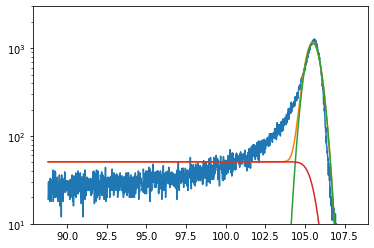

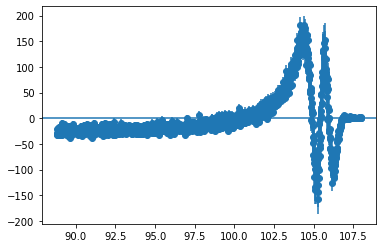

18.42750154877182
1.0614980681296515


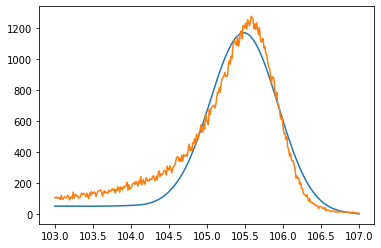

In [305]:
upper=9000
lower=7400

line_init = models.Gaussian1D(amplitude=1500, mean=105, stddev=0.4) + ConstShelf(norm=60, mean=105, stddev=0.4) + \
    ExpTail(norm=100, mean=105, stddev=0.8, slope=1)# + models.Const1D(amplitude=20)

line_init.amplitude_0.min = 0
line_init.stddev_1.tied=tie_stddevs
line_init.mean_1.tied = tie_means
line_init.norm_1.min = 0
line_init.norm_1.max = None
line_init.stddev_2.tied=tie_stddevs
line_init.mean_2.tied = tie_means
line_init.norm_2.min = 0
line_init.norm_2.max = None

fit_line = fitting.LevMarLSQFitter()
line = fit_line(line_init, clean_grade0_spectrum[1][lower:upper], clean_grade0_spectrum[0][lower:upper])
plt.plot(clean_grade0_spectrum[1][lower:upper], clean_grade0_spectrum[0][lower:upper])
plt.plot(clean_grade0_spectrum[1][lower:upper], line(clean_grade0_spectrum[1][lower:upper]))

plt.plot(clean_grade0_spectrum[1][lower:upper], line[0](clean_grade0_spectrum[1][lower:upper]))
plt.plot(clean_grade0_spectrum[1][lower:upper], line[1](clean_grade0_spectrum[1][lower:upper]))
plt.plot(clean_grade0_spectrum[1][lower:upper], line[2](clean_grade0_spectrum[1][lower:upper]))
#plt.plot(clean_grade0_spectrum[1][lower:upper], line[3](clean_grade0_spectrum[1][lower:upper]))
plt.semilogy()
plt.ylim(10,3000)
plt.show()

plt.errorbar(clean_grade0_spectrum[1][lower:upper],
             clean_grade0_spectrum[0][lower:upper] - line(clean_grade0_spectrum[1][lower:upper]),
             yerr=np.sqrt(clean_grade0_spectrum[0][lower:upper]),
             fmt='o'
            )
plt.axhline(0)
plt.show()

screened_cts = np.maximum(clean_grade0_spectrum[0][lower:upper], 1)

chisq_red = np.sum(((clean_grade0_spectrum[0][lower:upper] - line(clean_grade0_spectrum[1][lower:upper])) ** 2)/\
                   screened_cts)/len(clean_grade0_spectrum[0][lower:upper] - 6)
print(chisq_red)

xs = np.linspace(103, 107, int(1e6))
spline = UnivariateSpline(xs,
                          line(xs) - line(xs).max()/2)
roots = spline.roots() # find the roots
plt.plot(xs, spline(xs)+line(xs).max()/2)
plt.plot(clean_grade0_spectrum[1][np.abs(clean_grade0_spectrum[1] - 105) < 2],
         clean_grade0_spectrum[0][np.abs(clean_grade0_spectrum[1] - 105) < 2])
del xs, spline
print(roots[1] - roots[0])


In [301]:
line.slope_2

Parameter('slope_2', value=0.9378988678451035)

In [132]:
clean_grade0_spectrum[1][5000]

60.0109995

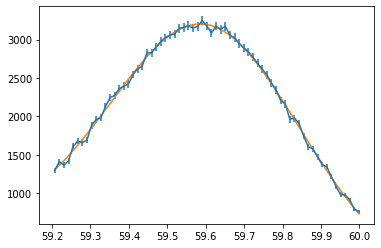

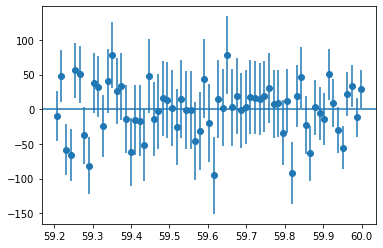

0.7678218175274625
0.6117582082842645
Model: CompoundModel41
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1]
Components: 
    [0]: <Gaussian1D(amplitude=3000., mean=59.6, stddev=0.3)>

    [1]: <Linear1D(slope=-1., intercept=10.)>
Parameters:
       amplitude_0           mean_0      ...      slope_1          intercept_1   
    ------------------ ----------------- ... ------------------ -----------------
    2975.1035990868104 59.59866183709552 ... -667.7715603865305 40022.22332311859


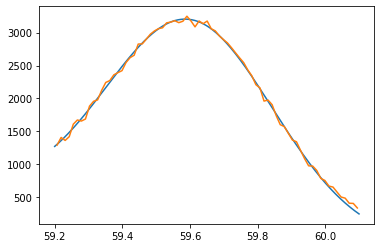

In [133]:
upper=4995
lower=4930
lower=4933
upper=5000

line_init = models.Gaussian1D(amplitude=3000, mean=59.6, stddev=0.3) + models.Linear1D(slope=-1, intercept=10-0)
fit_line = fitting.LevMarLSQFitter()
line = fit_line(line_init, clean_grade0_spectrum[1][lower:upper], clean_grade0_spectrum[0][lower:upper])
plt.errorbar(clean_grade0_spectrum[1][lower:upper], clean_grade0_spectrum[0][lower:upper],
             yerr=np.sqrt(clean_grade0_spectrum[0][lower:upper]))
plt.plot(clean_grade0_spectrum[1][lower:upper], line(clean_grade0_spectrum[1][lower:upper]))
plt.show()

plt.errorbar(clean_grade0_spectrum[1][lower:upper],
             clean_grade0_spectrum[0][lower:upper] - line(clean_grade0_spectrum[1][lower:upper]),
             yerr=np.sqrt(clean_grade0_spectrum[0][lower:upper]),
             fmt='o'
            )
plt.axhline(0)
plt.show()

chisq_red = np.sum(((clean_grade0_spectrum[0][lower:upper] - line(clean_grade0_spectrum[1][lower:upper])) ** 2)/\
                   clean_grade0_spectrum[0][lower:upper])/len(clean_grade0_spectrum[0][lower:upper] - 5)

print(chisq_red)
xs = np.linspace(59.2, 60.1, int(1e6))
spline = UnivariateSpline(xs,
                          line(xs) - line(xs).max()/2)
roots = spline.roots() # find the roots
plt.plot(xs, spline(xs)+line(xs).max()/2)
plt.plot(clean_grade0_spectrum[1][np.abs(clean_grade0_spectrum[1] - 59.65) < 0.45],
         clean_grade0_spectrum[0][np.abs(clean_grade0_spectrum[1] - 59.65) < 0.45])
del xs, spline
print(roots[1] - roots[0])
print(line)

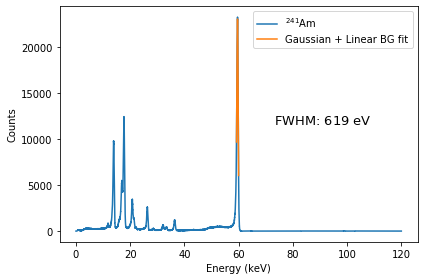

In [565]:
plt.plot(clean_grade0_spectrum[1], clean_grade0_spectrum[0], label='${}^{155}$Eu')
plt.plot(clean_grade0_spectrum[1][lower:upper], line(clean_grade0_spectrum[1][lower:upper]), label='Gaussian + Linear BG fit')
plt.text(0.6, 0.5, f'FWHM: ${619:.0f}$ eV', transform=plt.gca().transAxes, fontsize=13)
plt.legend()
#plt.title('Full Frame Spectrum, Single Pixel Events Only')
plt.ylabel('Counts')
plt.xlabel('Energy (keV)')
plt.tight_layout()
plt.savefig('energy_spectrum_floodAm241_5C_-500V_20190725_gain_grade0_GaussLinBG.pdf')

In [487]:
line

<CompoundModel115(amplitude_0=21115.3998748, mean_0=59.60044444, stddev_0=0.24368647, slope_1=-5104.3561973, intercept_1=306063.72795554)>

In [447]:
np.sqrt(fit_line.fit_info['cov_x'][2,2])*2.355*1000

0.05092735941567342

In [457]:
2.355*1000*np.sqrt(fit_line.fit_info['cov_x'][2,2]*((clean_grade0_spectrum[0][lower:upper] - line(clean_grade0_spectrum[1][lower:upper])) ** 2).sum()/(len(line(clean_grade0_spectrum[1][lower:upper])) - 5))

6.64907217768257

In [469]:
np.sqrt(fit_line.fit_info['param_cov'][2,2])*2.355*1000

6.64907217768257

In [483]:
def pixel_mask(x, y):
    return (h119_Am241.raw_data_1d['RAWX'] == x) & (h119_Am241.raw_data_1d['RAWY'] == y)

0.6101102477852365


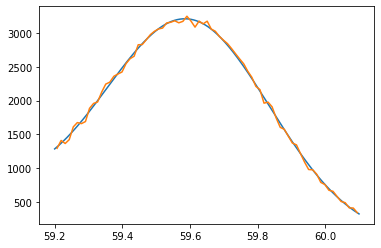

In [108]:
xs = np.linspace(59.2, 60.1, int(1e6))
spline = UnivariateSpline(xs,
                          line(xs) - line(xs).max()/2)
roots = spline.roots() # find the roots
plt.plot(xs, spline(xs)+line(xs).max()/2)
plt.plot(clean_grade0_spectrum[1][np.abs(clean_grade0_spectrum[1] - 59.65) < 0.45],
         clean_grade0_spectrum[0][np.abs(clean_grade0_spectrum[1] - 59.65) < 0.45])
del xs, spline
print(roots[1] - roots[0])

In [541]:
clean_grade0_spectrum[1][4999]

59.999000499999994

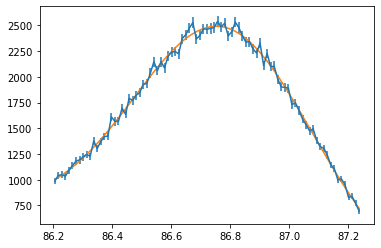

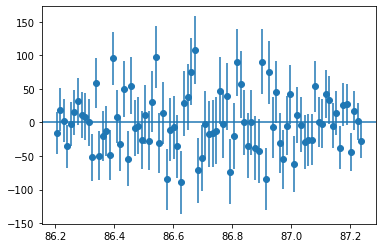

1.0015102143854457


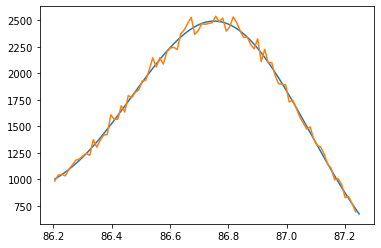

0.8073795874766176


(0.8073795874766176,
 <CompoundModel33(amplitude_0=2177.53125044, mean_0=86.77675928, stddev_0=0.30205755, slope_1=-582.45902416, intercept_1=50849.96025455)>)

In [72]:
fit_line(clean_grade0_spectrum, lower=7183, upper=7270, energy=86.8)

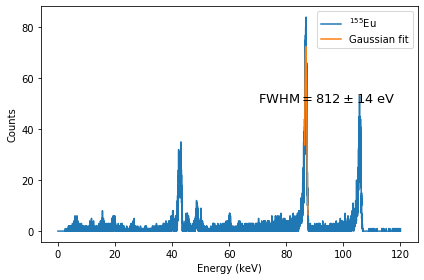

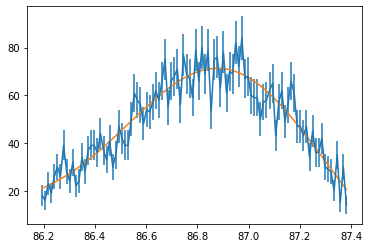

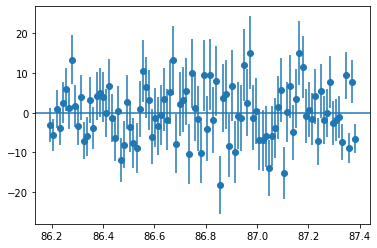

1.0057749785445989


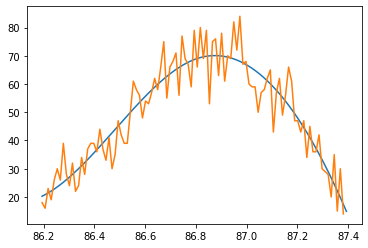

0.8835923359173421


In [144]:
i, j = 17, 13
cts, edges = np.histogram(h119_Eu155._energy_map[j][i], bins=10000, range=(0.1, 120))
h119_Am241.plot_spectrum(spectrum=np.array([cts, edges[:-1]*0.5 + edges[1:]*0.5]), save_plot=False,
                         fit_below=45, fit_above=55)
plt.show()
#print(i,j)
fwhm, line = fit_line(np.array([cts, edges[:-1]*0.5 + edges[1:]*0.5]), lower=7180, upper=7280, energy=86.8,
                                  plot=True)
            #fwhm, line = fit_line(np.array([cts, edges[:-1]*0.5 + edges[1:]*0.5]), lower=7170, upper=7270, energy=86.8, plot=False)
            #fwhm_map[i][j] = fwhm*1000
#            fwhm_map_low[i][j] = fwhm*1000
        
#fwhm_map = np.ma.masked_equal(fwhm_map, 1)
#fwhm_map_low = np.ma.masked_equal(fwhm_map_low, 1)

In [133]:
channel = h119_Eu155.raw_data_1d.loc[pixel_mask(16,14) & grade_mask, 'PH'].values
chan_low, chan_high = h119_Eu155.source.chan_range(None, 0.013,
            width=1000)
spectrum, edges = np.histogram(channel, bins=np.arange(1,10000), 
                        range=(0, 10000))
                    # 'centroid' is the channel with the most counts in the 
                    # interval between 'chan_low' and 'chan_high'.
centroid = np.argmax(spectrum[chan_low:chan_high]
                       ) + chan_low
fit_below=70
fit_above=50
fit_channels = np.arange(
                        centroid - fit_below, centroid + fit_above)
g_init = models.Gaussian1D(amplitude=spectrum[centroid], 
                        mean=centroid, stddev=75)# + models.Linear1D(slope=.001, intercept=-50)
fit_g = fitting.LevMarLSQFitter()
g = fit_g(g_init, fit_channels, spectrum[fit_channels])
print(g.mean)

Parameter('mean', value=6942.984309202195)


6952.640738661447

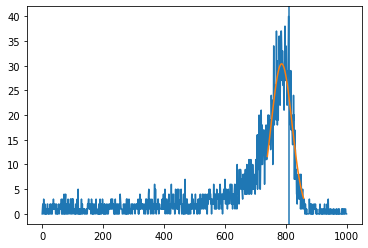

In [134]:
plt.plot(spectrum[chan_low:chan_high])
plt.axvline(np.argmax(spectrum[chan_low:chan_high]
                       ))
plt.plot(fit_channels - chan_low, g(fit_channels))
6952.640738661447

In [145]:
i, j = 17, 12
fwhm_map = np.ones((32,32))
#fwhm_map_low = np.ones((32,32))
for i in range(14,19):
    for j in range(12,17):
        if len(h119_Eu155._energy_map[j][i]) and not (i==16 and j==14):
            cts, edges = np.histogram(h119_Eu155._energy_map[j][i], bins=10000, range=(0.1, 120))
#h119_Am241.plot_spectrum(spectrum=np.array([cts, edges[:-1]*0.5 + edges[1:]*0.5]), save_plot=False,
#                         fit_below=30, fit_above=40)
#plt.show()
            print(i,j)
            fwhm, line = fit_line(np.array([cts, edges[:-1]*0.5 + edges[1:]*0.5]), lower=7170, upper=7275, energy=86.8,
                                  plot=False)
            #fwhm, line = fit_line(np.array([cts, edges[:-1]*0.5 + edges[1:]*0.5]), lower=4930, upper=5000, plot=False)
            fwhm_map[i][j] = fwhm*1000
            #fwhm_map_low[i][j] = fwhm*1000
        
fwhm_map = np.ma.masked_equal(fwhm_map, 1)
#fwhm_map_low = np.ma.masked_equal(fwhm_map_low, 1)

14 12
0.9817269948117024
0.8214765334060274
14 13
0.75512650374331
0.7959440497352688
14 14
1.2083487233316546
0.7995309328953795
14 15
0.9379852506875338
0.7321588012082856
14 16
1.2491723714920944
0.912604168823762
15 12
1.1189350039683217
0.7439643644542002
15 13
1.0908603016930576
0.8110152993978232
15 14
1.1225540511143712
0.763239381684599
15 15
0.7840827442358386
0.7810765753284841
15 16
1.2153267156625382
0.7239963808993082
16 12
0.9439528319311344
0.8263621025629959
16 13
0.9259433150802491
0.7019355274885726
16 15
0.7182397048689371
0.7392963852291103
16 16
0.9167608257018182
0.9602851357077071
17 12
1.0023374980972226
0.7151834762622258
17 13
1.110483857831695
0.8727206777998759
17 15
0.9269752270499175
0.7148818356352109
17 16
1.140725306709805
0.7927609907903559
18 12
1.2281419884370706
0.7916182992556173
18 13
0.9712171553556377
0.9156918328147583
18 14
1.0081477886445016
0.9365392101296237
18 15
1.0188107912433777
0.8413652041461859
18 16
0.843008260448088
1.084809020860

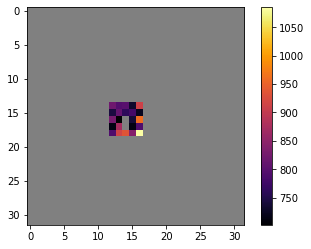

NameError: name 'fwhm_map_low' is not defined

In [148]:
cmap = matplotlib.cm.get_cmap('inferno')
cmap.set_bad(color='gray')
plt.imshow(fwhm_map, cmap = cmap)
plt.colorbar()
plt.show()

cmap = matplotlib.cm.get_cmap('inferno')
cmap.set_bad(color='gray')
plt.imshow(fwhm_map_low, cmap = cmap)
plt.colorbar()
plt.show()

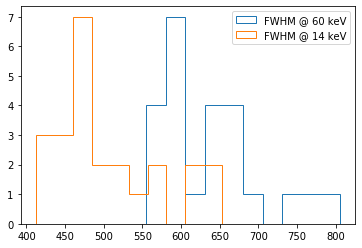

In [328]:
plt.hist(fwhm_map.data.flatten()[fwhm_map.data.flatten() > 1], histtype='step', label='FWHM @ 60 keV')
plt.hist(fwhm_map_low.data.flatten()[fwhm_map_low.data.flatten() > 1], histtype='step', label='FWHM @ 14 keV')
plt.legend()
plt.show()

In [147]:
import matplotlib

In [49]:
def fit_line(spec, lower=7150, upper=7300, energy=86, plot=True):
    #upper=4995
    #lower=4930
    #lower=4920
    #upper=5010

    line_init = models.Gaussian1D(amplitude=np.max(spec[0]), mean=energy, stddev=0.3) + models.Linear1D(slope=-20, intercept=1000)
    fit_l = fitting.LevMarLSQFitter()
    line = fit_l(line_init, spec[1][lower:upper], spec[0][lower:upper])
    if plot:
        plt.errorbar(spec[1][lower:upper], spec[0][lower:upper],
             yerr=np.sqrt(spec[0][lower:upper]))
        plt.plot(spec[1][lower:upper], line(spec[1][lower:upper]))
        plt.show()

        plt.errorbar(spec[1][lower:upper],
             spec[0][lower:upper] - line(spec[1][lower:upper]),
             yerr=np.sqrt(spec[0][lower:upper]),
             fmt='o'
            )
        plt.axhline(0)
        plt.show()
    
    screened_cts = np.maximum(spec[0][lower:upper], 1)

    chisq_red = np.sum(((spec[0][lower:upper] - line(spec[1][lower:upper])) ** 2)/
                   screened_cts)/len(spec[0][lower:upper] - 5)

    print(chisq_red)
    xs = np.linspace(spec[1][lower], spec[1][upper], int(1e6))
    spline = UnivariateSpline(xs,
                          line(xs) - line(xs).max()/2)
    roots = spline.roots() # find the roots
    if plot:
        plt.plot(xs, spline(xs)+line(xs).max()/2)
        plt.plot(spec[1][lower:upper],
         spec[0][lower:upper])
        plt.show()
    del xs, spline
    print(roots[1] - roots[0])
    return roots[1] - roots[0], line
    #print(line)

0.757551542403575
0.6152702123126375
0.9913506725486694
0.5053145376024482


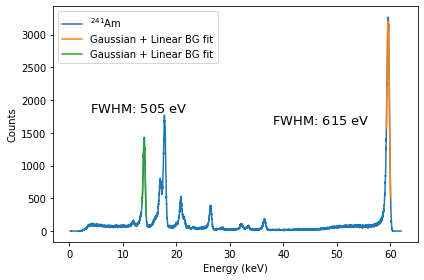

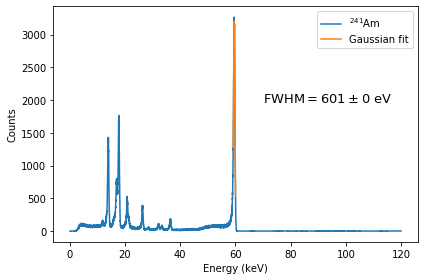

In [265]:
best_pixels = [(14, 12), (14, 14), (14, 15),
              (15, 16),
              (16, 13), (16, 15),
              (17, 12), (17, 15), (17, 16),
              (18, 12)]
#best_pixels = [(17, 12), (18, 12), (17, 15)]
best_energy_map = []
#for i, j in best_pixels:
for i in range(14,19):
    for j in range(12,17):
        best_energy_map += h119_Am241._energy_map[j][i]

cts, edges = np.histogram(best_energy_map, bins=10000, range=(0.1, 120))
spec = np.array([cts, edges[:-1]*0.5 + edges[1:]*0.5])


lower=4933
upper=5000
fwhm, line = fit_line(spec, lower=lower, upper=upper, plot=False)

plt.plot(spec[1][(spec[1] < 62) & (spec[1] > 0)], spec[0][(spec[1] < 62) & (spec[1] > 0)], label='${}^{241}$Am')
plt.plot(spec[1][lower:upper], line(spec[1][lower:upper]), label='Gaussian + Linear BG fit')
plt.text(0.6, 0.5, f'FWHM: ${fwhm*1000:.0f}$ eV', transform=plt.gca().transAxes, fontsize=13)

lower=1120
upper=1190
fwhm, line = fit_line(spec, lower=lower, upper=upper, energy=14, plot=False)
plt.plot(spec[1][lower:upper],
         line(spec[1][lower:upper]),
         label='Gaussian + Linear BG fit')
plt.text(0.1, 0.55, f'FWHM: ${fwhm*1000:.0f}$ eV', transform=plt.gca().transAxes, fontsize=13)


plt.legend()
#plt.title('10 Best Pixels Between (14, 12) and (18, 16), Single Pixel Events Only')
plt.ylabel('Counts')
plt.xlabel('Energy (keV)')
plt.tight_layout()
plt.show()
h119_Am241.plot_spectrum(spectrum=np.array([cts, edges[:-1]*0.5 + edges[1:]*0.5]), save_plot=False,
                         fit_below=30, fit_above=40)
plt.show()


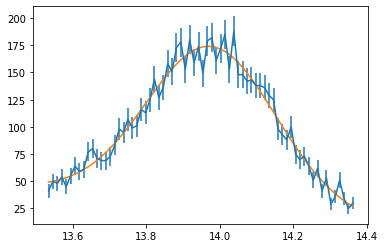

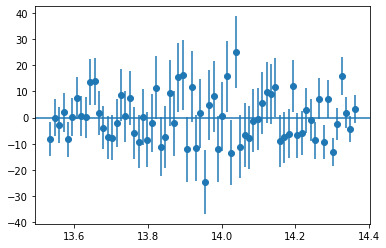

0.8574638100076426


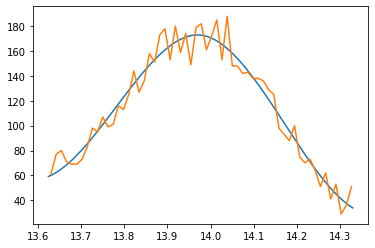

0.47988043276486536


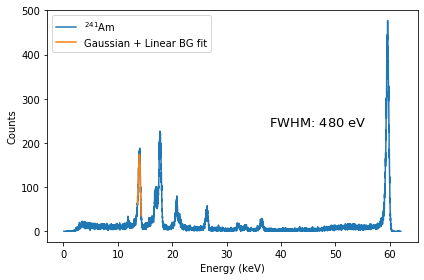

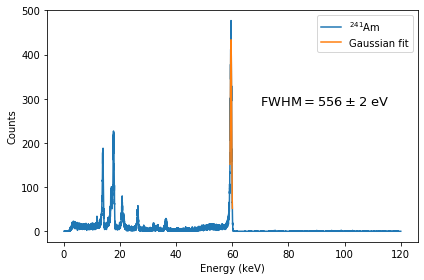

In [263]:
best_pixels = [(14, 12), (14, 14), (14, 15),
              (15, 16),
              (16, 13), (16, 15),
              (17, 12), (17, 15), (17, 16),
              (18, 12)]
best_pixels = [(17, 12), (18, 12), (17, 15)]
best_energy_map = []
for i, j in best_pixels:
    best_energy_map += h119_Am241._energy_map[j][i]

cts, edges = np.histogram(best_energy_map, bins=10000, range=(0.1, 120))
spec = np.array([cts, edges[:-1]*0.5 + edges[1:]*0.5])

fwhm, line = fit_line(spec, lower=1120, upper=1190, energy=14)


plt.plot(spec[1][(spec[1] < 62) & (spec[1] > 0)], spec[0][(spec[1] < 62) & (spec[1] > 0)], label='${}^{241}$Am')
plt.plot(spec[1][(spec[1] < line.mean_0+line.stddev_0*2) & (spec[1] > line.mean_0-line.stddev_0*2)],
         line(spec[1][(spec[1] < line.mean_0+line.stddev_0*2) & (spec[1] > line.mean_0-line.stddev_0*2)]),
         label='Gaussian + Linear BG fit')
plt.text(0.6, 0.5, f'FWHM: ${fwhm*1000:.0f}$ eV', transform=plt.gca().transAxes, fontsize=13)
plt.legend()
#plt.title('10 Best Pixels Between (14, 12) and (18, 16), Single Pixel Events Only')
plt.ylabel('Counts')
plt.xlabel('Energy (keV)')
plt.tight_layout()
plt.show()
h119_Am241.plot_spectrum(spectrum=np.array([cts, edges[:-1]*0.5 + edges[1:]*0.5]), save_plot=False,
                         fit_below=30, fit_above=40)
plt.show()


In [ ]:
plt.hist([h119_Am241.raw_data_1d.loc[pixel_mask(17, 14) & (other_data['GRADE'] == 0)]['PH'],
          h119_Am241.raw_data_1d.loc[pixel_mask(17, 14) & (other_data['GRADE'] == 1)]['PH'],
          h119_Am241.raw_data_1d.loc[pixel_mask(17, 14) & (other_data['GRADE'] == 2)]['PH'],
          h119_Am241.raw_data_1d.loc[pixel_mask(17, 14) & (other_data['GRADE'] == 3)]['PH'],
          h119_Am241.raw_data_1d.loc[pixel_mask(17, 14) & (other_data['GRADE'] == 4)]['PH'],
          h119_Am241.raw_data_1d.loc[pixel_mask(17, 14) & (other_data['GRADE'] == 4)]['PH'],
          h119_Am241.raw_data_1d.loc[pixel_mask(17, 14) & (other_data['GRADE'] == 4)]['PH']],
         np.arange(1, 6000), histtype='barstacked')
plt.savefig('energy_spectrum_Am241_17_14_by_grade.pdf')
plt.show()

plt.hist(other_data[pixel_mask(17, 14)]['GRADE'], bins=np.arange(14))
plt.show()

In [94]:
def pixel_mask(x, y):
    return (h119_Eu155.raw_data_1d['RAWX'] == x) & (h119_Eu155.raw_data_1d['RAWY'] == y)

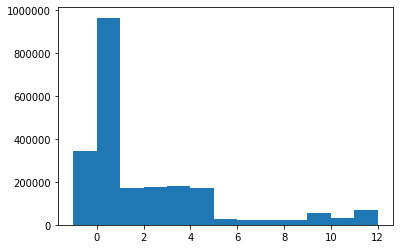

(array([1.17206e+05, 3.74200e+03, 2.07300e+03, 4.49500e+03, 5.13800e+03,
        2.78700e+03, 7.21000e+02, 4.84000e+02, 1.28200e+03, 3.27600e+03,
        1.86700e+03, 1.48000e+03, 2.63300e+03, 1.87100e+03, 3.24000e+02,
        2.00000e+02, 2.47000e+02, 1.09000e+02, 5.06000e+02, 1.98000e+02,
        6.18000e+02, 0.00000e+00, 8.90000e+01, 6.90000e+01, 0.00000e+00,
        2.80000e+01, 3.16000e+02, 5.97000e+02, 3.98700e+03, 1.15500e+03,
        8.70000e+01, 2.96500e+03]),
 array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.,
        12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24.,
        25., 26., 27., 28., 29., 30., 31.]),
 <a list of 32 Patch objects>)

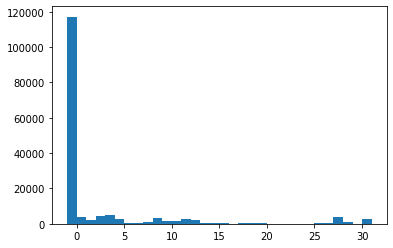

In [373]:
plt.hist(other_data['GRADE'], bins=13)
plt.show()
plt.hist(even_more_data['GRADE'].loc[pixel_mask(17, 14)], bins=32)

In [334]:
even_more_data, _ = nudetect.fits_to_df("floodEu155_5C_-500V_20190816_small_region_all_grades.fits",
                                   ["GRADE"],
                                   pos=0)

In [340]:
gradesums = np.loadtxt('log.txt')

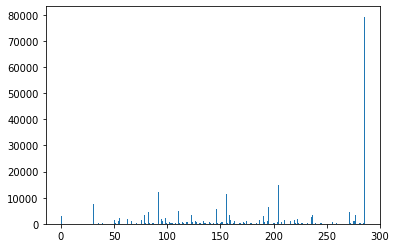

In [363]:
h= plt.hist(gradesums, bins=np.arange(287))

In [364]:
cts = h[0]

In [368]:
edges = h[1][:-1]

In [372]:
gradesums.shape

(226783,)

In [375]:
h119_Eu155.gen_quick_gain()

/users/milan/nudetect/nudetect.py:4009: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()
/users/milan/nudetect/nudetect.py:4009: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()
/users/milan/nudetect/nudetect.py:4009: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()
/users/milan/nudetect/nudetect.py:4009: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()
/users/milan/nudetect/nudetect.py:4009: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()
/users/milan/nudetect/nudetect.py:4

masked_array(
  data=[[--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        ...,
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=0.0)

In [377]:
mean_maps = np.load('full_mean_data_noise_-0_1V_5C_20190624_e_corrected_nogain.npy')

In [407]:
mean_maps[:,1,0]

array([-66.14015814, -65.49779196, -75.89640794, -22.17546338,
       -32.46595604, -42.55979416, -55.0768261 , -22.89548126,
        33.14177603, -38.03047446, -49.86968897, -33.25027753,
         3.00775488, -44.48302879, -61.84359207, -52.58769487])

In [381]:
noisemap = fits.open('H119_5C_0V_NOISEMAP.fits')

In [415]:
noisemap[1].header['comment'] = 'Updated August 23, 2019. H119 5C 0V'

In [ ]:
noisemap[1].data['OFFSET'] = mean_maps.T.reshape(1024, 16)

In [397]:
a = np.tile(np.arange(5), (2,3,1))
a

array([[[0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4]],

       [[0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4]]])

In [398]:
a.reshape((6,5))

array([[0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4]])